![example](../images/movies.jpg)

# Movies Profitability Analysis Based on Genres' Criteria. 

**By Yevgeniy Kostrov**
***

## Overview
I will perform an analysis on a large data set of movies.  The data includes many different types of information about each movie, such as the release date, the budget, the box office earnings domestic and worldwide, and genres. I will analyze this data set to determine what contributes to a movie being a “success”.  For this analysis, I will define success in the terms of profit, basing the success of a movie on the amount of money it earns in comparison to the movie’s budget.

## Business Problem

As the demand for new, original content grows, in part due to the rise of streaming platforms such as Netflix, Hulu, Amazon Prime, Disney+, and others producing original movies and television shows, so too does the need for comprehensive analytics about what makes a movie successful. With the ever growing demand for new movies and the wide range of movie genres, analytics about the performance of movies can give useful information to studios so that they can make the most strategic decisions regarding production and financing. 


Each year, the entertainment industry produces more movies, bigger movies, and more types of media compete for audience attention. Between 2000 and 2010, just 36% of movies had profitable box-office returns. So missing the mark is more costly than ever, and your every decision takes more into account. Success hinges on your professional experience and the industry insights of those around you. In all, it is a pretty closed system with a lot of opportunity for subjective interpretation.


***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***
I am going to work with data from IMDB database. Specifically, the table that has release date, movie title, production title, and gross revenue domestics and worldwide. I will, also, use the table with primary title, original title, start year, run minutes, and genres.  I will focus on budgets and revenues as main assessment of the "success" of a movie. I will see how the release month affects the success: in what months the most profitable movies are released. 

In [2]:
# Import standard packages
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir,'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from Tools import convert_doll_to_int, convert_number_to_month
%matplotlib inline
from Tools import convert_doll_to_int, convert_number_to_month

In [3]:
# Here you run your code to explore the data
data_path = os.path.join(os.pardir,'data', 'zippedData')
files = os.listdir(data_path)

In [4]:
data = {}
for file in files:
    import_path = os.path.join(data_path, file)
    data[file] = pd.read_csv(import_path)

In [21]:
title_basics = data['imdb.title.basics.csv.gz'].copy()
movie_budgets = data['tn.movie_budgets.csv.gz'].copy()
tmdb_movies = data['tmdb.movies.csv.gz'].copy()
ratings = data['imdb.title.ratings.csv.gz'].copy()
title_principals = data['imdb.title.principals.csv.gz'].copy()
crew = data['imdb.title.crew.csv.gz'].copy()
name_basic = data['imdb.name.basics.csv.gz'].copy()
crew = data['imdb.title.crew.csv.gz'].copy()

# BUDGETS:

## We start by looking at the information about the columns in the Budgets table

In [22]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## We start analyzing the budgets table by converting columns with money from string into integer.

In [23]:
for item in ['production_budget', 'worldwide_gross','domestic_gross']:
    movie_budgets[item] = movie_budgets[item].map(convert_doll_to_int)
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


## We also look at the statistics summary of the Budgets table.

In [24]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## We want to check for duplicates in titles and drop the duplicates if we have any

In [25]:
movie_budgets[movie_budgets.duplicated(subset=['movie'])].shape

(84, 6)

In [26]:
movie_budgets = movie_budgets.drop_duplicates(subset=['movie'])

## Create two columns with domestic_profit and worldwide profit for our analysis of success

In [27]:
movie_budgets['domestic_profit'] = movie_budgets['domestic_gross'] - movie_budgets['production_budget']
movie_budgets['worldwide_profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

## Drop the movies that are not profitable both domestically and worldwide

In [28]:
movie_budgets.drop(movie_budgets[(movie_budgets.domestic_profit < 0)].index, inplace = True)
movie_budgets.drop(movie_budgets[(movie_budgets.worldwide_profit < 0)].index, inplace = True)

## We take a look at the most profitable movies

In [29]:
movie_budgets = movie_budgets.sort_values(by=['worldwide_profit'], ascending=False)
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,459363944,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,437270625,1433854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,163007020,1328722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,398279547,1292935897
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,256193157,1216693157
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,500059566,1148258224
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,247719760,1135772799


## Drop movies released before 2000. We want to focus on recent years as most relevant to our discoveries. We create column with release year and release month.

In [30]:
movie_budgets.release_date =  pd.to_datetime(movie_budgets.release_date)
movie_budgets['release_month'] = pd.DatetimeIndex(movie_budgets.release_date).month
movie_budgets['release_year'] = pd.DatetimeIndex(movie_budgets.release_date).year
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,12,2009
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,459363944,2008208395,12,1997
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,4,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,12,2015
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864,6,2015
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,163007020,1328722794,4,2015
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,398279547,1292935897,5,2012
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,256193157,1216693157,7,2011
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,500059566,1148258224,2,2018
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,247719760,1135772799,6,2018


In [31]:
movie_budgets[ (movie_budgets.release_year > 2018) & (movie_budgets.release_month>4)].head(30)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month,release_year
80,81,2019-05-24,Aladdin,182000000,246734314,619234314,64734314,437234314,5,2019
1380,81,2019-05-17,John Wick: Chapter 3 â Parabellum,40000000,141744320,256498033,101744320,216498033,5,2019
1370,71,2019-05-31,Rocketman,41000000,57342725,108642725,16342725,67642725,5,2019
4265,66,2019-05-31,MA,5000000,36049540,44300625,31049540,39300625,5,2019
3871,72,2019-05-03,The Intruder,8000000,35095904,36005871,27095904,28005871,5,2019
4012,13,2019-05-24,BrightBurn,7000000,16794432,27989498,9794432,20989498,5,2019


In [32]:
movie_budgets.drop(movie_budgets[movie_budgets.release_year < 2000].index, inplace=True)

## We will zoom in on the release month for the movies the bring profit both domestically and wordlwide

In [35]:
top_movies = movie_budgets.copy()
top_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,worldwide_profit,release_month,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,12,2009
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,378815482,1748134200,4,2018
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,630662225,1747311220,12,2015
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864,6,2015
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,163007020,1328722794,4,2015


## First part of our data analysis is on the release month. We will plot the histogram of the release months for the top 1000 profitable movies.

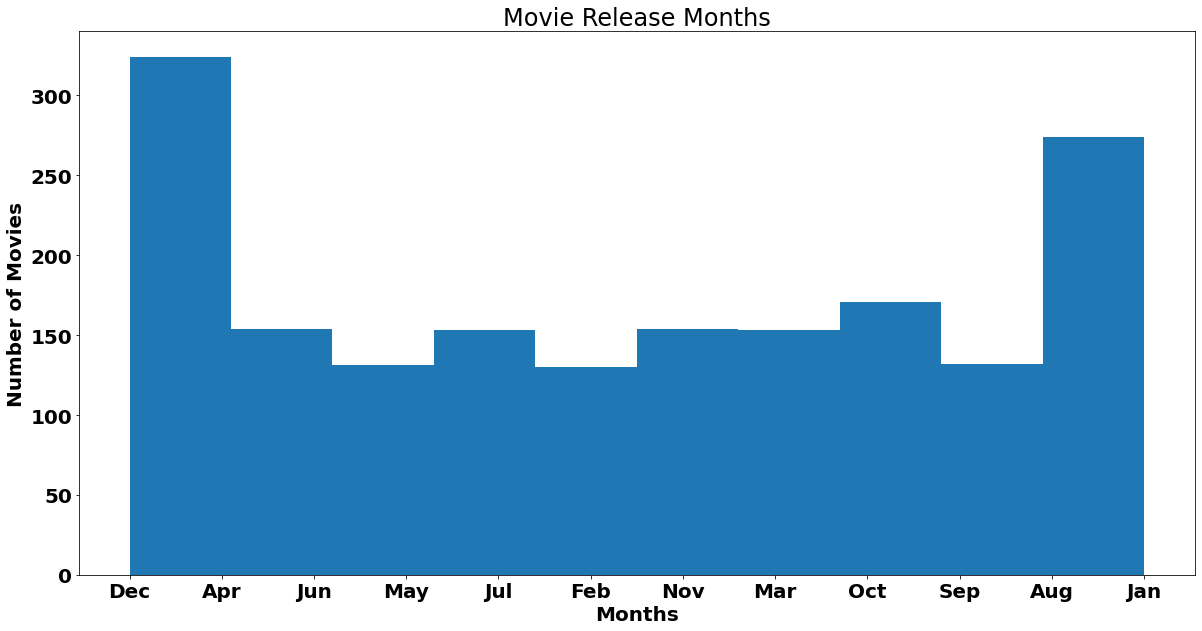

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("Movie Release Months")
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
ax.set_xlabel("Months", **font)
ax.set_ylabel("Number of Movies", **font)
ax.hist(top_movies.release_month.apply(convert_number_to_month))
plt.savefig("../images/ReleaseMonthHist.png")

# Genres

## Now we want to get to the main focus of our study
*** 
## We take a look at the basic_titles table

In [39]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [41]:
title_basics[title_basics.duplicated(subset=['primary_title'])].shape

(0, 6)

## There are no duplicates

## We see that there are only 4,000  genres missing

## Next, we are going to visualize top titles present in the movies that make profit both domestically and worldwide

In [47]:
new_df = title_basics.set_index('primary_title').join(top_movies.set_index('movie'),how='inner')
new_df.drop_duplicates(subset=['original_title'],inplace=True)
new_df = new_df.sort_values(by=['worldwide_profit'], ascending=False)

In [48]:
genres_dict = {}
for i in new_df.genres.dropna().str.split(","):
    for j in i:
        if j in genres_dict.keys():
            genres_dict[j] +=1
        else:
            genres_dict[j] = 1

In [49]:
sorted_dict = {}
sorted_keys = sorted(genres_dict, key=genres_dict.get, reverse=True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = genres_dict[w]

genres_dict = sorted_dict

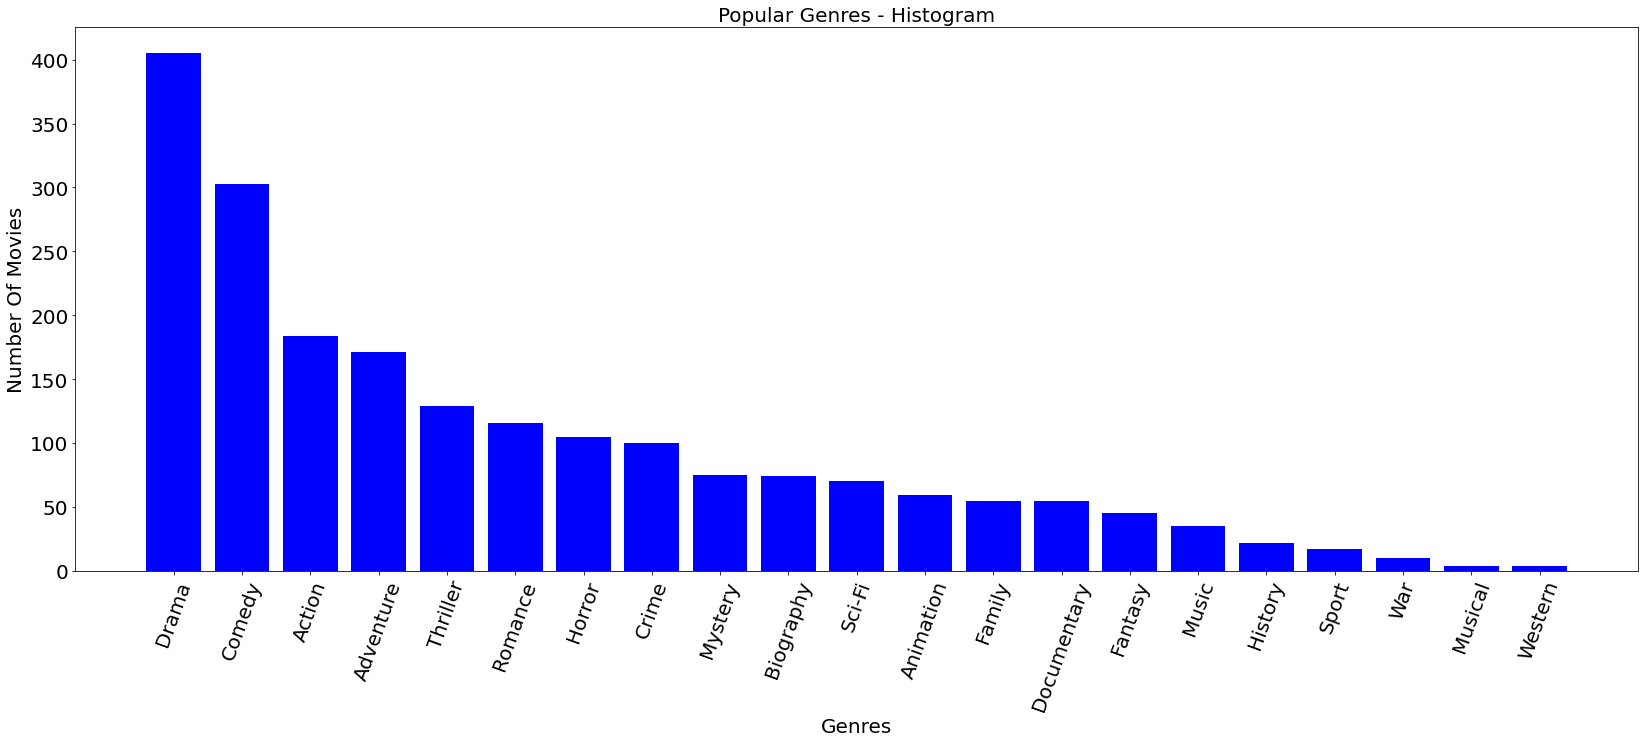

In [52]:
plt.figure(figsize=(28,10))
font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.xticks(rotation=70, **font)
plt.bar(list(genres_dict.keys()), genres_dict.values(), color='b')
plt.title("Popular Genres - Histogram", **font)
plt.xlabel("Genres",**font)
plt.ylabel("Number Of Movies", **font)
plt.savefig("../images/IndividualGenresHist.png")
plt.show()

## We also interested in the most common intersection of genres in the top 1000 movies

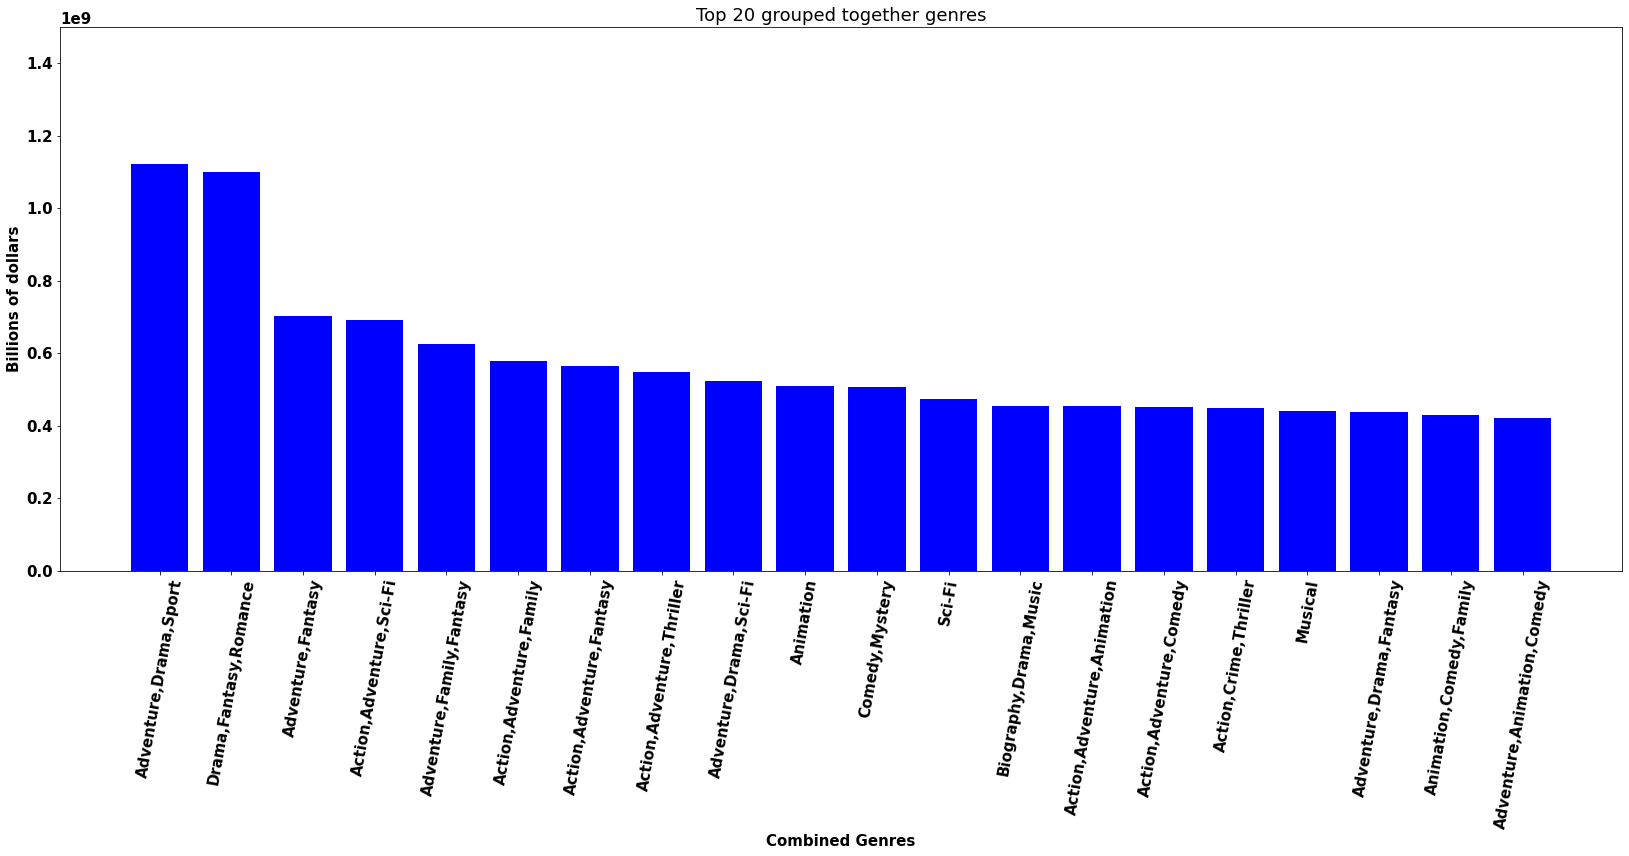

In [110]:
plot_df = new_df.groupby('genres', as_index=False)['worldwide_profit'].mean()
plot_df = plot_df.sort_values(by=['worldwide_profit'],ascending=False)
x = list(plot_df['genres'].head(20))
profit = list(plot_df['worldwide_profit'].head(20))

x_pos = [i for i, _ in enumerate(x)]
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(28,10))
plt.bar(x_pos, profit, color='blue')
plt.xlabel("Combined Genres", **font)
plt.ylabel("Billions of dollars", **font)
plt.title("Top 20 grouped together genres")
plt.xticks(x_pos, x, rotation=80)
plt.ylim(0,1500000000)
plt.savefig("../images/GroupedGenresHist.png")
plt.show()

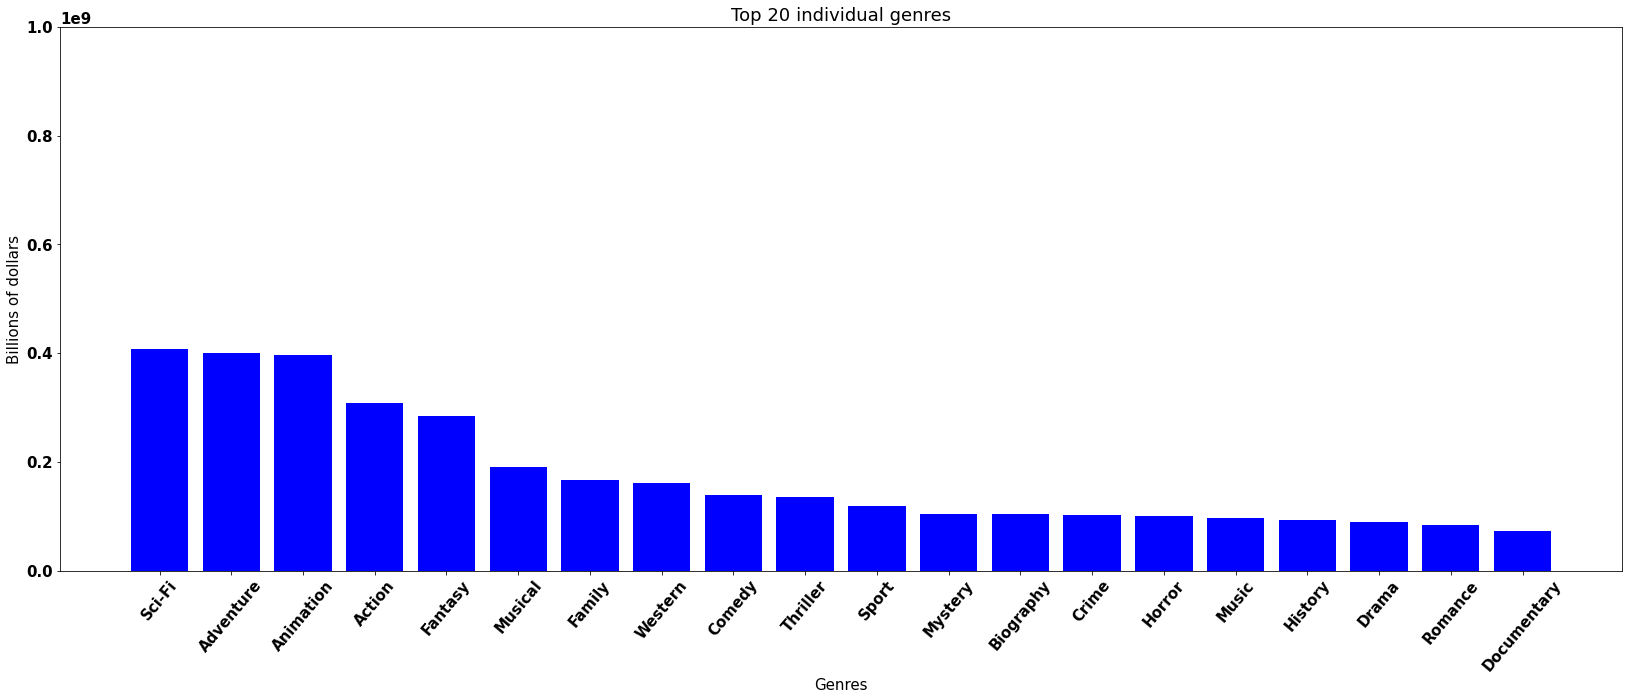

In [53]:
new_df['genres_list']= new_df.genres.str.split(",")
aver_by_genres = new_df.explode('genres_list')
plot_df = aver_by_genres.groupby('genres_list',as_index=False)['worldwide_profit'].mean()

plot_df = plot_df.sort_values(by=['worldwide_profit'],ascending=False)
x = list(plot_df['genres_list'].head(20))
profit = list(plot_df['worldwide_profit'].head(20))

x_pos = [i for i, _ in enumerate(x)]
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(figsize=(28,10))
plt.bar(x_pos, profit, color='blue')
plt.xlabel("Genres")
plt.ylabel("")
plt.title("Top 20 individual genres")
plt.ylabel("Billions of dollars")
plt.xticks(x_pos, x, rotation=50)
plt.ylim(0,1000000000)
plt.show()


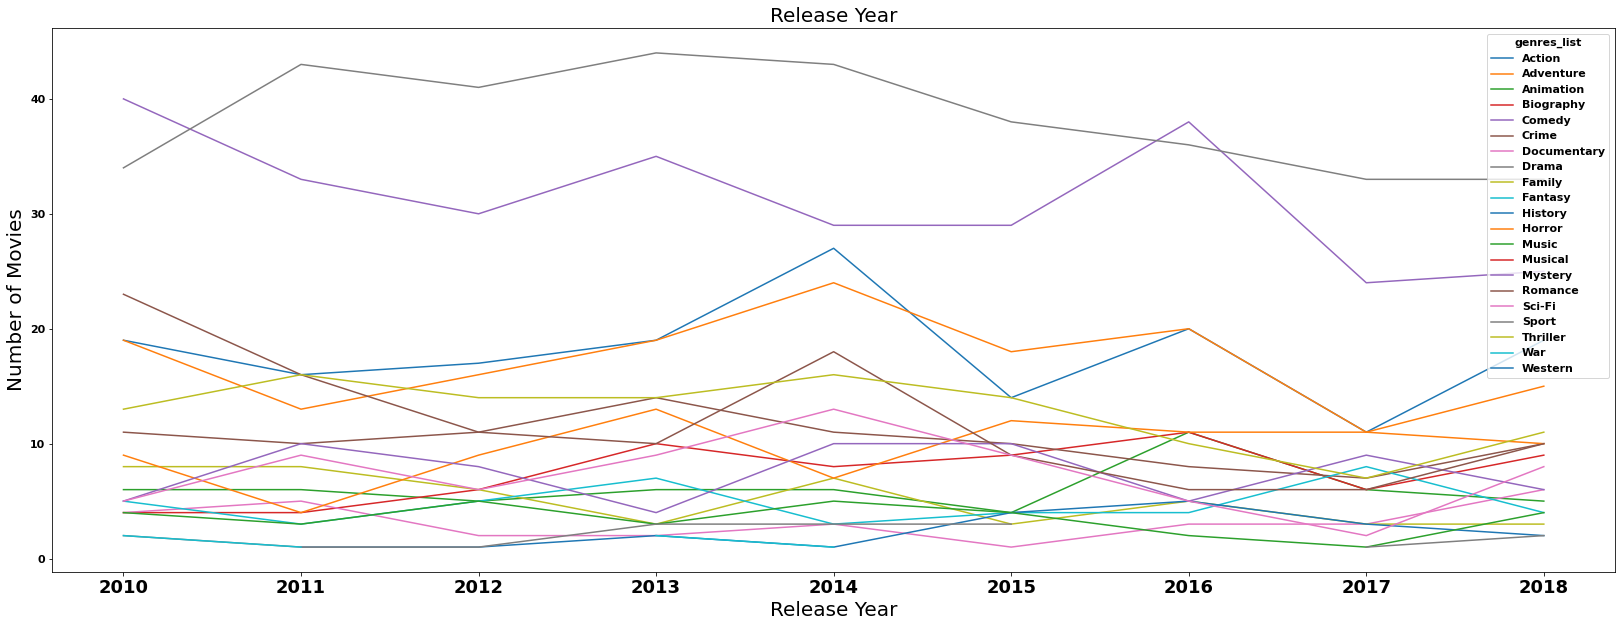

In [83]:
new_df = title_basics.set_index('primary_title').join(movie_budgets.set_index('movie'),how='inner')
new_df.drop(new_df[new_df.release_year < 2010].index, inplace=True)
new_df.drop(new_df[new_df.release_year > 2018].index, inplace=True)
new_df.reset_index()
new_df.drop_duplicates(subset=['original_title'],inplace=True)
new_df['genres_list']= new_df.genres.str.split(",")
new_df = new_df.explode('genres_list')
new_df.set_index('tconst',inplace=True)
new_df['count'] = 0
list_years = new_df.release_year.unique()
new_df = new_df.groupby(['genres_list','release_year'],as_index=False).count()
fig, ax = plt.subplots(figsize=(28,10))
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 11}
plt.rc('font', **font)
new_df = new_df.pivot(index='release_year',columns='genres_list',values='count')
ax.set_xticks(np.sort(list_years))
ax.set_xticklabels(np.sort(list_years), fontsize=18) 
ax.set_title("Release Year",fontsize=20)
new_df.plot(ax=ax)
ax.set_xlabel("Release Year", fontsize=20)
ax.set_ylabel("Number of Movies", fontsize=20)
ax.figure.savefig('../images/demo-file.png')

<AxesSubplot:title={'center':'Release Year'}, xlabel='release_year', ylabel='Number of Movies'>

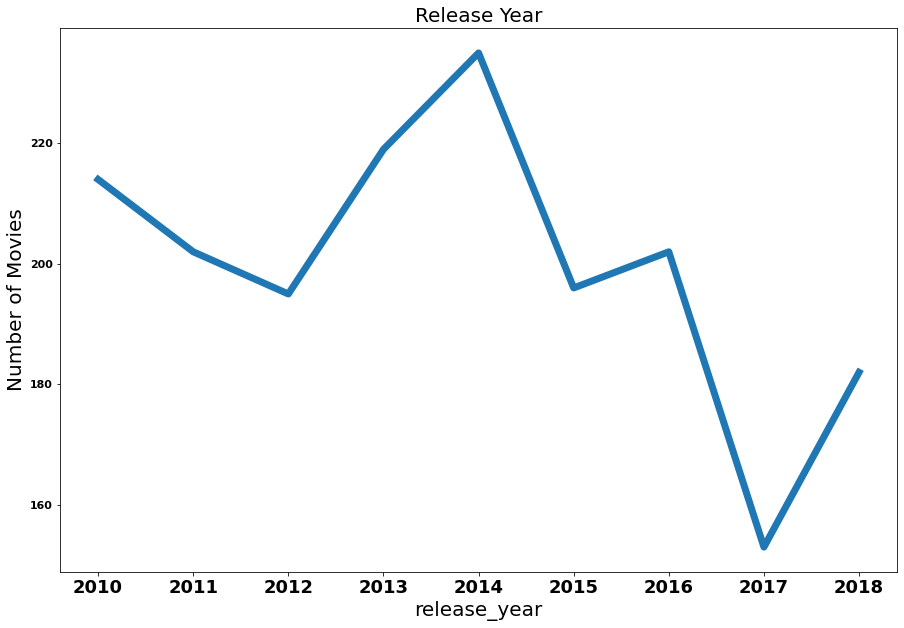

In [81]:
fig, ax = plt.subplots(figsize=(15,10))
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 11}
plt.rc('font', **font)
ax.set_xticks(np.sort(list_years))
ax.set_xticklabels(np.sort(list_years), fontsize=18) 
ax.set_title("Release Year",fontsize=20)
ax.set_xlabel("Release Year", fontsize=20)
ax.set_ylabel("Number of Movies", fontsize=20)
ax.figure.savefig('../images/demo-file.png')
new_df.sum(axis=1).plot(ax=ax, linewidth=7)


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***